# Machine Learning Clustering

Probleemstelling: Een eigenaar van een supermarkt wilt zijn klanten begrijpen. Met deze inzichten kan er beter reclame worden gemaakt voor de verschillende groepen klanten.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from itertools import product
from sklearn.metrics import silhouette_score

In [9]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In deze dataset zijn Gender, Age, Annual Income en Spending Score interessant. CustomerID is niet nodig om klanten in te delen in clusters. Alle data is aanwezig, er zijn geen lege velden. Gender moet worden aangepast naar numerieke waarden. Dit is zodat dit later gebruikt kan worden voor het clusteren.

In [10]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

## EDA

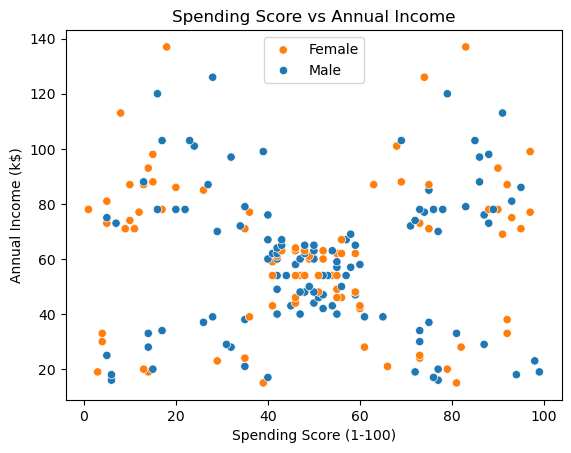

In [12]:
sns.scatterplot(data=df, x='Spending Score (1-100)', y='Annual Income (k$)', hue='Gender')
plt.title('Spending Score vs Annual Income')
plt.legend(['Female', 'Male'])
plt.show()

Spending Score, die hierboven en later gebruikt wordt, is een score die aan een klant word toegekend. Deze score wordt berekend aan de hand van klantgedrag en data van eerderer aankopen. 

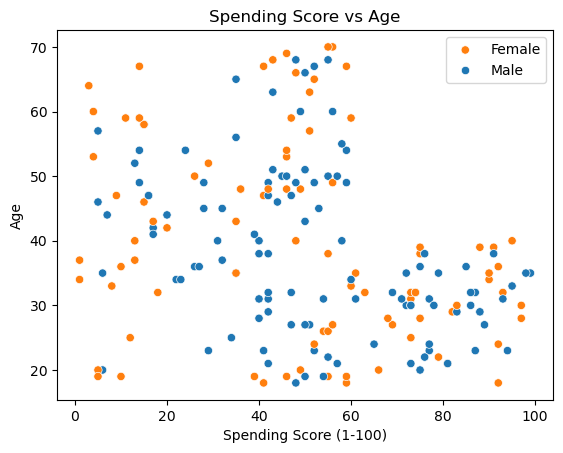

In [14]:
sns.scatterplot(data=df, x='Spending Score (1-100)', y='Age', hue='Gender')
plt.title('Spending Score vs Age') 
plt.legend(['Female', 'Male'])
plt.show()

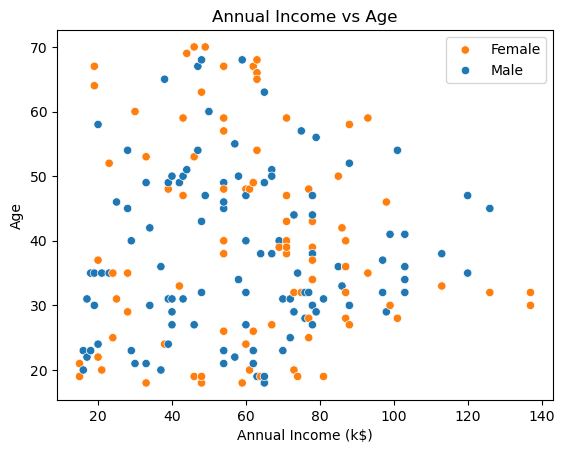

In [15]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Age', hue='Gender')
plt.title('Annual Income vs Age') 
plt.legend(['Female', 'Male'])
plt.show()

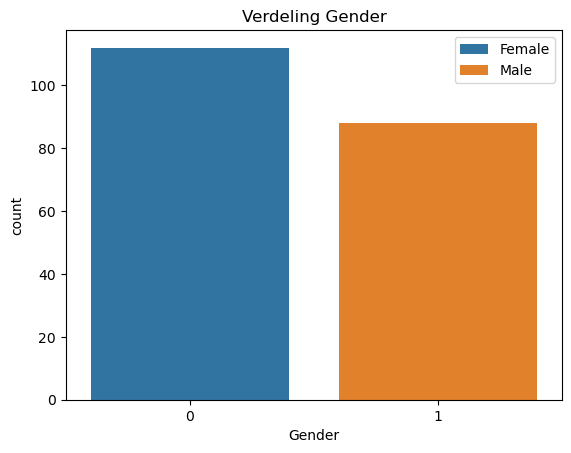

In [16]:
sns.countplot(x='Gender', data=df, hue='Gender')
plt.title('Verdeling Gender')
plt.legend(['Female', 'Male'])
plt.show()

## Clustering

De algoritmen die zijn gekozen om te gebruiken bij deze dataset zijn K-mean en DBSCAN. Beiden hebben voor- en nadelen.  
#### K-mean  
Voordelen:  
- Goed te begrijpen: K-mean is goed te begrijpen, het is overzichtelijk en duidelijk voor de gebruiker.
- Snel te gebruiken: K-mean is ook snel om te gebruiken. Zowel het uitvoeren van het algoritme als het begrijpen heeft niet veel tijd nodig.
  
Nadelen:
- Clusters: Voordat de K-mean uitgevoerd kan worden moet het aantal clusters bepaald worden.
- Outliers: Outliers hebben een groot effect op het resultaat, aangezien K-mean de afstand moet berekenen om het aantal clusters te bepalen. Outliers hebben dus veel invloed.
#### DBSCAN  
Voordelen: 
- Vorm: Kan clusters vinden van een willekeurige vorm, hoeft niet perse rond te zijn.  
- Outliers: Kan outliers vinden en behandelen.  
- Clusters: Kan automatisch het aantal clusters bepalen.
  
Nadelen:
- Parameters: DBSCAN is sterk afhankelijk van de parameters die worden opgegeven. 

## K-mean

K-mean is een algoritme om data in clusters te verdelen. Er worden een aantal centroids bepaald, en elk datapunt word aan de dichtsbijzijnde centroid gekoppeld. Het doel is om de objecten in een cluster zo gelijk mogelijk aan elkaar te maken, en de objecten in verschillende groepen zo verschillend mogelijk.

Om K-mean te gebruiken moet er eerst bepaald worden hoeveel clusters er nodig zijn. Dit kan met de Elbow method, hierbij worden er een aantal K-mean clusterings uitgevoerd voor meerdere waarden van het aantal clusters. Hierna wordt de WCSS berekend, dit is de som van de kwadraten van de afstanden tussen elk punt en het middenpunt van de cluster. Dan wordt het aantal clusters tegenover de WCSS gezet. Op het punt waar de afname van de WCSS veel verandert zal het meest optimale aantal clusters liggen.

### Spending Score & Annual Income

In dit deel wordt er gekeken naar de Spending Score tegenover het jaarlijks inkomen van de klanten. Hierdoor kunnen er verschillende groepen klanten gevonden worden.

C:\Users\sem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

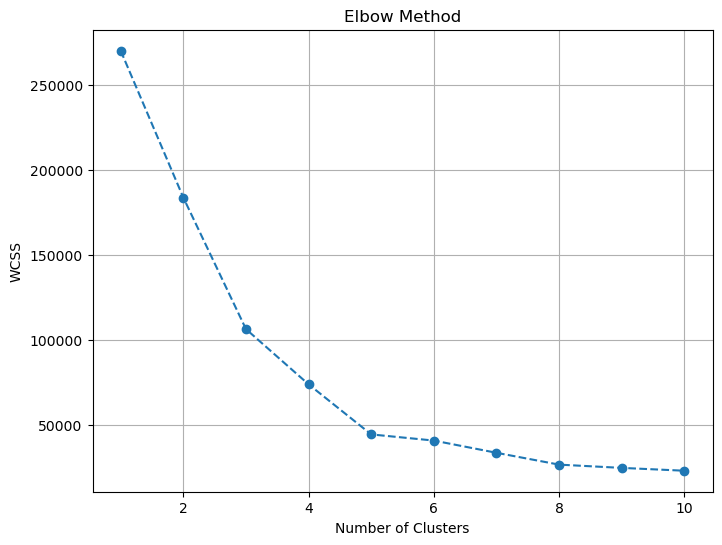

In [87]:
X = df[['Spending Score (1-100)', 'Annual Income (k$)']]
wcss = [] 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In de grafiek is duidelijk te zien dat bij 5 clusters de afname van WCSS afneemt. Dit betekent dat 5 het optimale aantal clusters is.

C:\Users\sem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


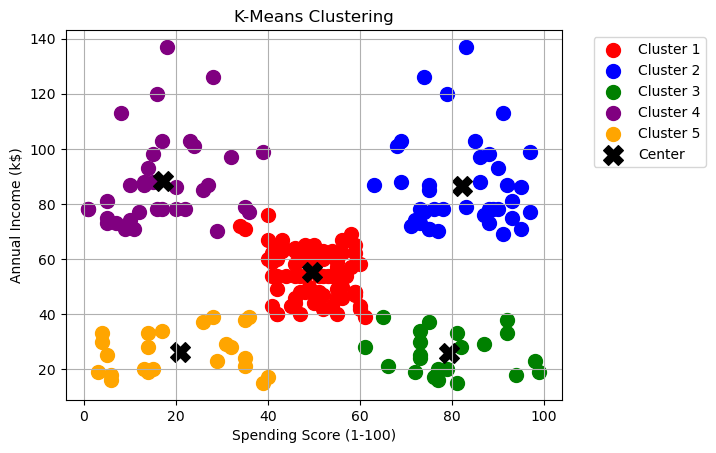

In [89]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = y_kmeans 

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(5):
    plt.scatter(X.values[y_kmeans == i, 0], X.values[y_kmeans == i, 1], 
                s=100, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Center')

plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('K-Means Clustering')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

Er zijn 5 groepen van klanten te zien, die allemaal een andere manier van boodschappen doen hebben.  
Cluster 1(Blauw): Dit is de meest voorkomende klant. Ze hebben een gemiddeld inkomen, en geven een gemiddeld bedrag uit aan boodschappen. Dit zijn meestal geen impulskopers, ze halen wat ze nodig hebben en worden niet afgeleid door aanbiedingen.    

Cluster 2(Groen): Deze groep heeft een hoog inkomen en geven veel geld uit. Ze geven veel om luxe producten, en aanbiedingen maken ze niet uit omdat ze het geld hebben om het normaal te kopen.    

Cluster 3(Oranje):Deze groep heeft een laag inkomen maar geven veel geld uit. Ze kopen veel producten op impuls, zeker als het in de aanbieding is.    

Cluster 4(Paars): Deze klanten hebben een hoog inkomen, maar geven niet veel geld uit aan boodschappen. Ze sparen hun geld liever dan het uit te geven aan onnodige producten.     

Cluster 5(Rood): Deze groep heeft een laag inkomen, en geven weinig geld uit. Ze zijn gefocust op de prijzen, en kopen alleen producten die ze nodig hebben.  

### Spending Score & Age

In dit deel wordt er gekeken naar de Spending Score tegenover de leeftijd van de klanten.

C:\Users\sem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

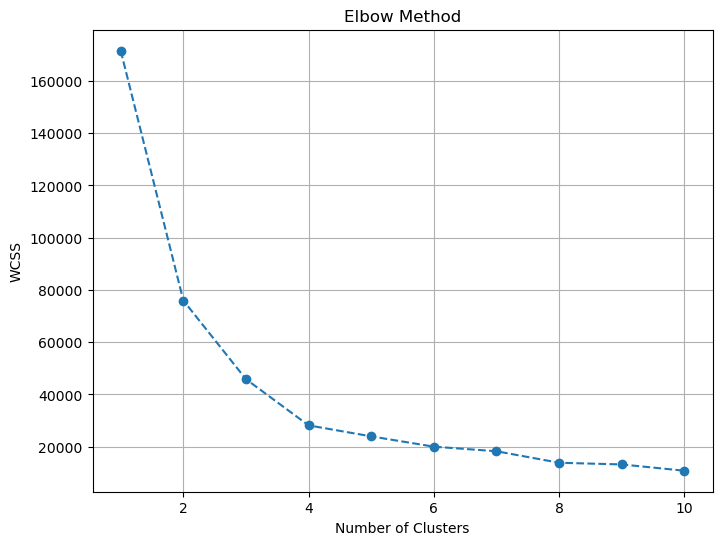

In [110]:
X = df[['Spending Score (1-100)', 'Age']]
wcss = [] 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In deze grafiek zijn er 2 punten van clusters die kunnen werken. Zowel bij 2 als bij 4 clusters neemt de afname af. Daarom worden deze allebei getest.

C:\Users\sem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


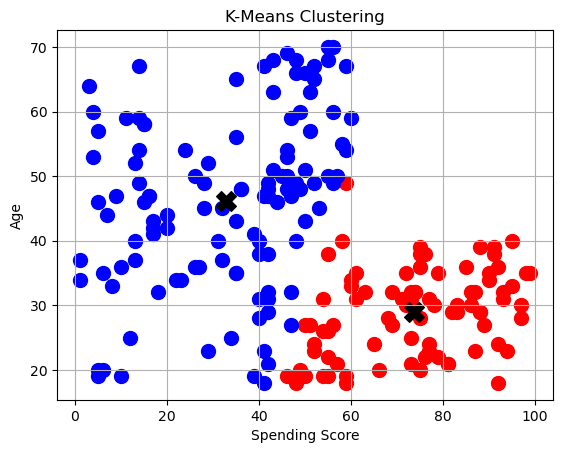

In [113]:
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = y_kmeans 

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(5):
    plt.scatter(X.values[y_kmeans == i, 0], X.values[y_kmeans == i, 1], 
                s=100, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Center')

plt.xlabel('Spending Score')
plt.ylabel('Age')
plt.title('K-Means Clustering')
plt.grid(True)
plt.show()

Bij het gebruik van twee clusters valt er iets op. De rode cluster, degene met een hoge spending score, zijn bijna allemaal onder 40 jaar oud. De jongeren geven meer over het algemeen meer geld uit dan de oudere generatie. Toch zijn er ook jongere mensen die minder geld uitgeven aan boodschappen.

C:\Users\sem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


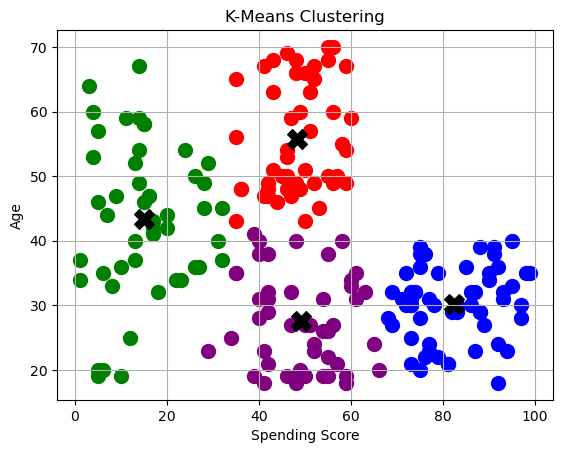

In [116]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = y_kmeans 

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(5):
    plt.scatter(X.values[y_kmeans == i, 0], X.values[y_kmeans == i, 1], 
                s=100, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Center')

plt.xlabel('Spending Score')
plt.ylabel('Age')
plt.title('K-Means Clustering')
plt.grid(True)
plt.show()

Bij het gebruik van 4 clusters ontstaan er ook een aantal duidelijke groepen. De groene cluster is een groep mensen van varierende leeftijd die niet veel geld uitgeefd aan boodschappen. De twee clusters met een gemiddelde Spending Score verschillen alleen in leeftijd, paars is vooral onder de 40 jaar oud, en rood alles boven de 40. De blauwe cluster is de groep die veel geld uitgeeft aan boodschappen, terwijl ze ook jong zijn, onder de 40 jaar oud.

## Hiërarchisch clusteren

Hiërarchisch clusteren is een machine learning-techniek om data te groeperen in clusters op basis van hun onderlinge gelijkenissen. Het resultaat is een hiërarchische structuur, een dendrogram, waarin kleinere clusters worden samengevoegd of opgesplitst.  
Er zijn twee soorten hiërarchisch clusteren:  

Agglomeratief (Bottum-up):  
1. Start met elk datapunt als afzonderlijk cluster.
2. Berekent de afstand tussen alle paren van clusters.
3. Combineert de dichtsbijzijnde clusters.
4. Herhaalt het proces.  
De afstand tussen de punten wordt berekend met de euclidische afstand. Dit is een maat voor de rechte lijn afstand tussen twee punten met de volgende formule:  
√(x2-x1)^2+(y2-y1)^2

Divisief (Top-down):
1. Start met elk datapunt in 1 cluster.
2. Splitst de minst gelijke punten in twee nieuwe clusters.
3. Herhaalt het proces totdat alle punten een eigen cluster heeft.  

Voor dit project is er voor Agglomeratief clusteren gekozen, omdat dit beter werkt met kleinere datasets. Ook is dit makkelijker toe te passen en makkelijker om te begrijpen vanwege het dendrogram.

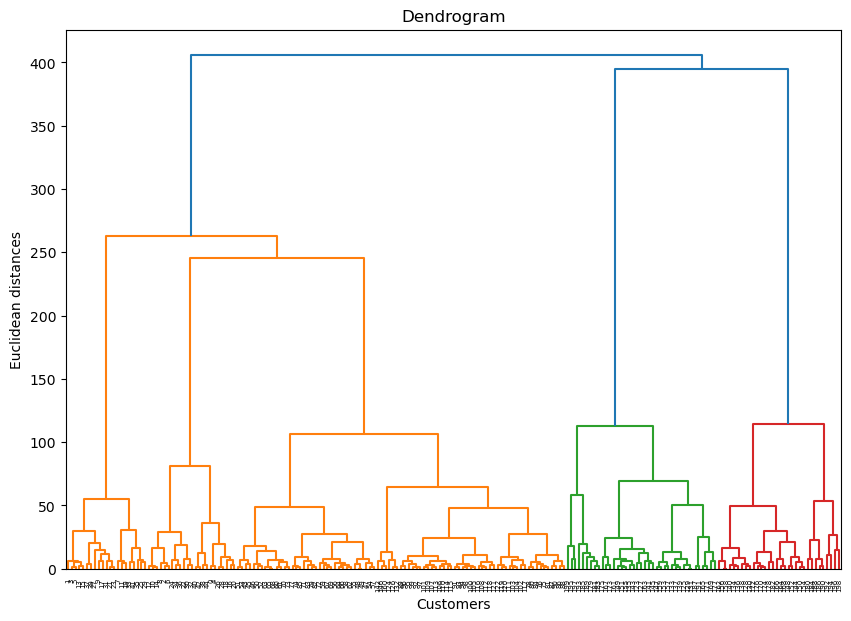

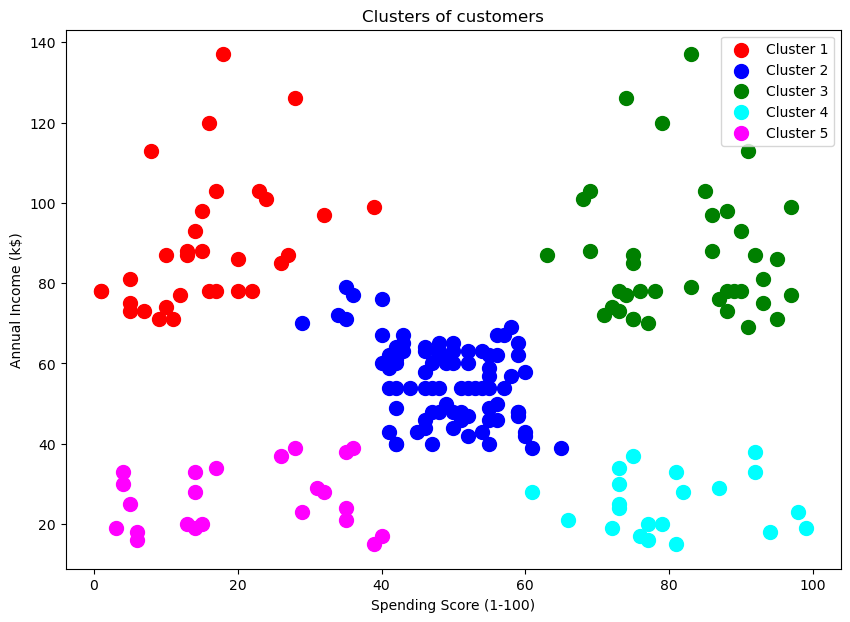

In [136]:
X = df.iloc[:, [4, 3]].values

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(X)

plt.figure(figsize=(10, 7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

## DBSCAN

DBSCAN, oftwel Density-Based Spatial Clustering of Applications with Noise, is een algoritme dat zich focust op de density van de data. Ook kan deze methode de outliers identificeren en verwijderen.  
De definitie van dense moet bepaald worden, dit kan aan de hand van 2 parameters:  
Eps: Dit is de afstand, deze wordt bepaald met de euclidische afstand, die ook wordt gebruikt bij het hiërarchisch clusteren.  
Min_samples: Dit is het minimaal aantal punten binnen de afstand van Eps.

Omdat deze twee parameters verschillen per dataset, moeten deze vooraf bepaald worden. Dit kan gedaan worden door een heatmap te maken waarin de Eps tegnover de Min_samples wordt gezet, en het aantal clusters berekend worden.

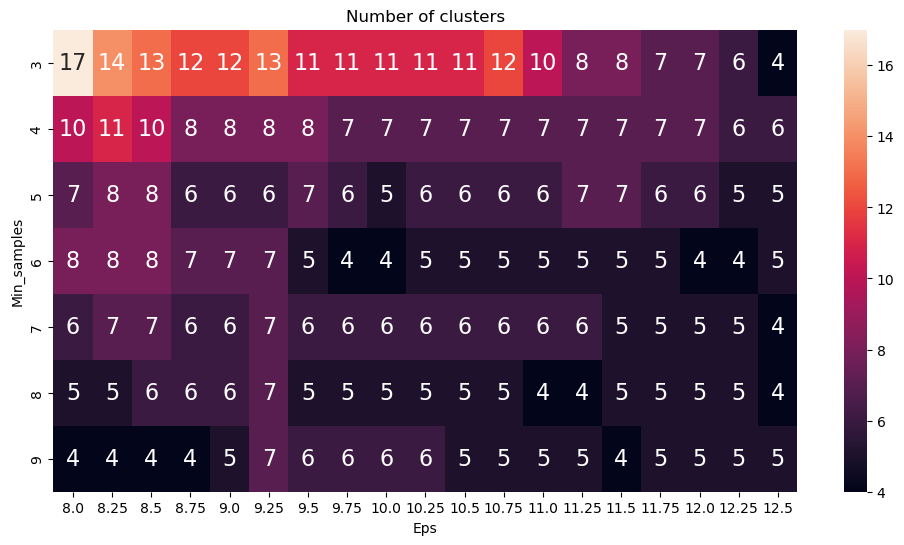

In [50]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
eps_values = np.arange(8,12.75,0.25) 
min_samples = np.arange(3,10)

DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))

tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, ax=ax)
ax.set_title('Number of clusters')
plt.show()

In de heatmap is te zien dat het aantal cluster van 4 tot 17 gaat. De meeste zijn tussen de 4 en 7. Om verder zeker te zijn van de parameters, moet er verder gekeken worden naar de silhouette score. De silhouette score is een maatstaf die wordt gebruikt om de kwaliteit van clusteren te bekijken. Het meet hoe dicht elk punt in een cluster bij de andere punten in zijn eigen cluster ligt, in vergelijking met punten in andere clusters. Deze score kan helpen bij het bepalen van het aantal cluster of de parameters. Hoe hoger de silhouette score, hoe beter de clustering is.

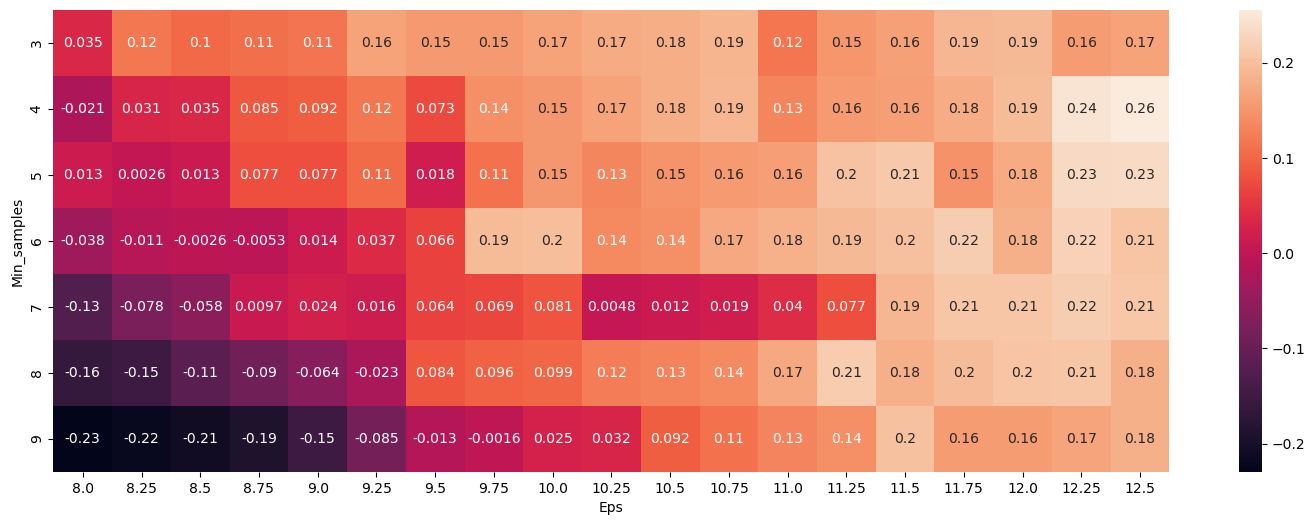

In [48]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, ax=ax)
plt.show()

Uit deze grafiek is de hoogste score 0,26 bij een Eps van 12.5 en een Min_samples van 4. Dit zijn de parameters die gebruikt moeten worden.

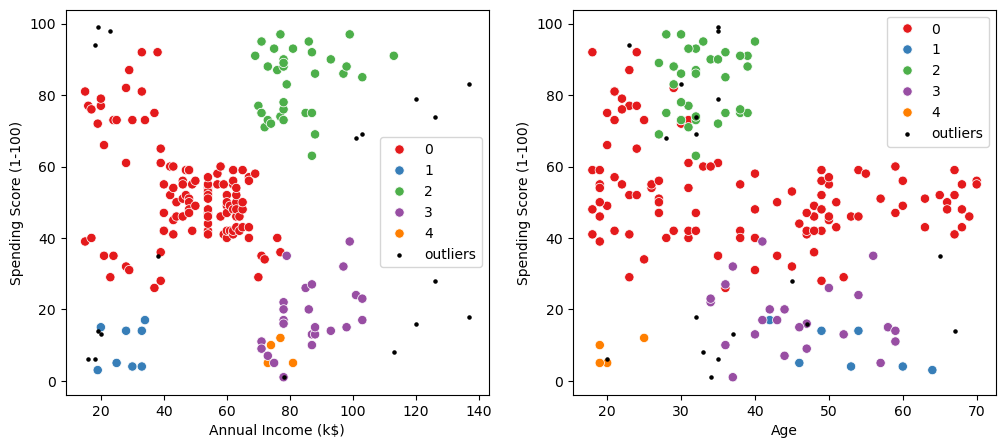

In [61]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X)

DBSCAN_clustered = X.copy()
DBSCAN_clustered.loc[:, 'Cluster'] = DBS_clustering.labels_
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster'] == -1]

fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()


plt.show()

In deze grafieken is te zien dat DBSCAN geen goede clusters heeft kunnen vinden. Clusters overlappen elkaar, er liggen outliers middenin clusters en ook de grootte van clusters klopt niet altijd. Dit kan komen doordat de density van een groep datapunten minder was dan de andere clusters, waardoor dit niet herkent wordt als een cluster. 